<a href="https://colab.research.google.com/github/soumyadip1995/NLP/blob/master/NLP_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Natural Language processing:- Word Embeddings

![alt text](https://cdn-images-1.medium.com/max/1600/1*Y6dOZIKoJ1ZS_pzBzG6rgg.jpeg)



##Word Vectors Introduction:-

Word vectors represent a significant leap forward in advancing our ability to analyse relationships across words, sentences and documents. In doing so, they advance technology by providing machines much more information about words than has previously been possible using traditional representations of words. It is word vectors that make technologies such as speech recognition and machine translation possible. There are many excellent explanations of word vectors, but in this one I want to make the concept accessible to data and research people who aren’t very familiar with natural language processing (NLP).

This blog post is divided into a few parts:-

1) Word Vector and its implementation in spacy
2) Word2vec and its Implementation in genism.
3) Word2vec- The skip gram model and its implementation inTensorflow.
4) GloVec and its implementation in genism.

##What are Word Vectors ?


Word vectors are simply vectors of numbers that represent the meaning of a word.

1. Traditional approaches to NLP, such as one-hot encoding and bag-of-words models (i.e. using dummy variables to represent the presence or absence of a word in an observation (e.g. a sentence)), while it is useful for some machine learning (ML) tasks, do not capture information about a word’s meaning or context. 
2. This means that potential relationships, such as contextual closeness, are not captured across collections of words.
3. For example, a one-hot encoding(Read my blog post [here](https://soumyadip1995.blogspot.com/2018/11/softmax-cross-entropy-and-logits.html))  cannot capture simple relationships, such as determining that the words “dog” and “cat” both refer to animals that are often discussed in the context of household pets. Such encodings often provide sufficient baselines for simple NLP tasks (for example, email spam classifiers), but lack the sophistication for more complex tasks such as translation and speech recognition.
4. In essence, traditional approaches to NLP, such as one-hot encodings, do not capture syntactic (structure) and semantic (meaning) relationships across collections of words and, therefore, represent language in a very naive way.


###So what does word Vectors represent ?

1. In contrast, word vectors represent words as multidimensional continuous floating point numbers where semantically similar words are mapped to proximate points in geometric space. In simpler terms, a word vector is a row of real valued numbers (as opposed to dummy numbers) where each point captures a dimension of the word’s meaning and where semantically similar words have similar vectors.

2. This means that words such as wheel and engine should have similar word vectors to the word car (because of the similarity of their meanings), whereas the word banana should be quite distant. Put differently, words that are used in a similar context will be mapped to a proximate vector space (we will get to how these word vectors are created below). 

####The beauty of representing words as vectors is that they lend themselves to mathematical operators. 
For example, we can add and subtract vectors — the example here is showing that by using word vectors we can determine that:

**king — man + woman = queen**

In other words, we can subtract one meaning from the word vector for king **(i.e. maleness)**, add another meaning **(femaleness)**, and show that this new word vector **(king — man + woman)** maps most closely to the word vector for queen.

####The numbers in the word vector represent the word’s distributed weight across dimensions. In a simplified sense each dimension represents a meaning and the word’s numerical weight on that dimension captures the closeness of its association with and to that meaning. Thus, the semantics of the word are embedded across the dimensions of the vector.


![alt text](https://cdn-images-1.medium.com/max/1600/0*mRGKYujQkI7PcMDE.)


*In the figure we are imagining that each dimension captures a clearly defined meaning. For example, if you imagine that the first dimension represents the meaning or concept of “animal”, then each word’s weight on that dimension represents how closely it relates to that concept.*

###Lets Take a look at some code..!!

Here we simply extract vectors for different animals and words that might be used to describe some of them

1. !pip install spacy
2. !pip install genism


In [0]:
import numpy as np
import spacy
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
nlp = spacy.load("en")

animals = "dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"

animal_tokens = nlp(animals)

animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])

pca = PCA(n_components=2)
animal_vecs_transformed = pca.fit_transform(animal_vectors)
animal_vecs_transformed = np.c_[animals.split(), animal_vecs_transformed]

print(animal_vecs_transformed)




[['dog' '-4.10985' '-4.348288']
 ['cat' '-3.3084655' '3.0057669']
 ['hamster' '-1.5816495' '-5.626022']
 ['lion' '-1.8283672' '-5.3341293']
 ['tiger' '-2.2155218' '-12.020755']
 ['elephant' '-3.3185718' '-6.0320954']
 ['cheetah' '-9.377931' '0.75000525']
 ['monkey' '-13.524899' '-2.0238194']
 ['gorilla' '-8.071078' '12.8918705']
 ['antelope' '4.5048137' '12.604737']
 ['rabbit' '-2.241043' '6.5200243']
 ['mouse' '-7.3981767' '7.173505']
 ['rat' '0.25032887' '1.8815123']
 ['zoo' '0.24084744' '0.82789576']
 ['home' '1.7767502' '-5.360579']
 ['pet' '7.2504945' '-9.15764']
 ['fluffy' '14.437566' '-2.1017866']
 ['wild' '8.833243' '-0.18511611']
 ['domesticated' '19.681509' '6.5349135']]


##Introduction to Word2Vec


1. Word2vec is a two-layer neural net that processes text. Its input is a text corpus and its output is a set of vectors: feature vectors for words in that corpus. While Word2vec is not a deep neural network, it turns text into a numerical form that deep nets can understand. Deeplearning4j implements a distributed form of Word2vec for Java and Scala, which works on Spark with GPUs.

2. Word2vec’s applications extend beyond parsing sentences in the wild. It can be applied just as well to genes, code, likes, playlists, social media graphs and other verbal or symbolic series in which patterns may be discerned.

3. Why? Because words are simply discrete states, and we are simply looking for the transitional probabilities between those states: the likelihood that they will co-occur

4. The purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace. That is, it detects similarities mathematically. Word2vec creates vectors that are distributed numerical representations of word features, features such as the context of individual words.


5. Given enough data, usage and contexts, Word2vec can make highly accurate guesses about a word’s meaning based on past appearances. Those guesses can be used to establish a word’s association with other words (e.g. “man” is to “boy” what “woman” is to “girl”), or cluster documents and classify them by topic. Those clusters can form the basis of search, sentiment analysis and recommendations in such diverse fields as scientific research, legal discovery, e-commerce and customer relationship management


###Lets look at some more code..!!


###There are two main training algorithms that can be used to learn the embedding from text; they are continuous bag of words (CBOW) and skip grams.

![alt text](https://skymind.ai/images/wiki/word2vec_diagrams.png)

Rather than loading a large text document or corpus from file, we will work with a small, in-memory list of pre-tokenized sentences. The model is trained and the minimum count for words is set to 1 so that no words are ignored.

After the model is learned, we summarize, print the vocabulary, then print a single vector for the word ‘sentence‘.

Finally, the model is saved to a file in binary format, loaded, and then summarized.

##Visualize Word Embedding


After you learn word embedding for your text data, it can be nice to explore it with visualization.

You can use classical projection methods to reduce the high-dimensional word vectors to two-dimensional plots and plot them on a graph.

The visualizations can provide a qualitative diagnostic for your learned model.

We can retrieve all of the vectors from a trained model 


We can then train a projection method on the vectors, such as those methods offered in scikit-learn, then use matplotlib to plot the projection as a scatter plot.

Let’s look at an example with Principal Component Analysis or PCA.

##Plot Word Vectors Using PCA


We can create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class.

The resulting projection can be plotted using matplotlib as follows, pulling out the two dimensions as x and y coordinates.


Putting this all together with the model from the previous section, the complete code is listed below

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[ 3.7957937e-03 -4.6860101e-03 -2.1289329e-03 -6.9453288e-04
 -3.4073649e-03  2.8863209e-03 -3.2903219e-03 -2.3412032e-03
  3.8941603e-03  1.9364387e-03 -3.8674660e-03 -4.4895345e-03
 -1.6543979e-03 -2.8772454e-03 -3.9632054e-04  1.3410648e-04
  1.2562564e-04  2.1559622e-03 -2.7948020e-03 -4.5389626e-03
  2.9321180e-03 -9.5496239e-07 -2.3726851e-03  2.1814210e-03
 -2.0658963e-03 -2.2483063e-03  2.8167469e-05 -2.7241621e-03
  3.7530735e-03 -7.3267374e-04  4.4231326e-03 -4.9053696e-03
 -8.2385459e-04 -2.3061098e-03 -7.6860364e-04  3.6757379e-03
  1.7725014e-03  1.6477654e-03  4.4191172e-03 -3.1761033e-03
 -1.7439697e-03  2.6228283e-05 -4.4351513e-03 -4.4595650e-03
  4.1398075e-03  9.1436443e-05 -1.8036851e-03 -1.5251118e-03
 -4.3378384e-03 -2.1042814e-03 -4.7226860e-03  4.4191498e-03
  3.1654714e-03 -4.0218891e-03  1.9265579e-0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


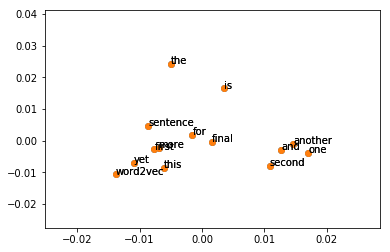

In [2]:


from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

from gensim.models import Word2Vec

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])

words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
  

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

#### Running the example creates a scatter plot with the dots annotated with the words.It is hard to pull much meaning out of the graph given such a tiny corpus was used to fit the model.


##Word2Vec (skip-gram model)


The algorithm exists in two flavors CBOW and Skip-Gram. Given a set of sentences (also called corpus) the model loops on the words of each sentence and either tries to use the current word of to predict its neighbors (its context), in which case the method is called “Skip-Gram”, or it uses each of these contexts to predict the current word, in which case the method is called “Continuous Bag Of Words” (CBOW). The limit on the number of words in each context is determined by a parameter called “window size”.

##Intuition

The skip-gram neural network model is actually surprisingly simple in its most basic form. Train a simple neural network with a single hidden layer to perform a certain task, but then we’re not actually going to use that neural network for the task we trained it on! Instead, the goal is actually just to learn the weights of the hidden layer–we’ll see that these weights are actually the “word vectors” that we’re trying to learn.


###As an example, let's consider the dataset

**the quick brown fox jumped over the lazy dog**

We first form a dataset of words and the contexts in which they appear. We could define 'context' in any way that makes sense, and in fact people have looked at syntactic contexts (i.e. the syntactic dependents of the current target word, see e.g. Levy et al.), words-to-the-left of the target, words-to-the-right of the target, etc. For now, let's stick to the vanilla definition and define 'context' as the window of words to the left and to the right of a target word. Using a window size of 1, we then have the dataset

**([the, brown], quick), ([quick, fox], brown), ([brown, jumped], fox)**, ..

of (context, target) pairs. Recall that skip-gram inverts contexts and targets, and tries to predict each context word from its target word, so the task becomes to predict 'the' and 'brown' from 'quick', 'quick' and 'fox' from 'brown', etc. Therefore our dataset becomes

**(quick, the), (quick, brown), (brown, quick), (brown, fox)**, ...

of **(input, output)** pairs. The objective function is defined over the entire dataset, but we typically optimize this with stochastic gradient descent (SGD) using one example at a time (or a 'minibatch' of batch_size examples, where typically 16 <= batch_size <= 512). 

###Visualization using tensorflow

We can visualize the learned vectors by projecting them down to 2 dimensions using for instance something like the t-SNE dimensionality reduction technique[t-SNE](https://https://lvdmaaten.github.io/tsne/). When we inspect these visualizations it becomes apparent that the vectors capture some general, and in fact quite useful, semantic information about words and their relationships to one another. It was very interesting when we first discovered that certain directions in the induced vector space specialize towards certain semantic relationships, e.g. male-female, verb tense and even country-capital relationships between words, as illustrated in the figure below 



![alt text](https://www.tensorflow.org/images/linear-relationships.png)



##The Code

###Visualizing the Learned Embeddings

After training has finished we can visualize the learned embeddings using t-SNE.


Found and verified text8.zip
Data size 17005207
Most common words (+UNK) [['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data [5234, 3081, 12, 6, 195, 2, 3134, 46, 59, 156] ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']
3081 originated -> 5234 anarchism
3081 originated -> 12 as
12 as -> 3081 originated
12 as -> 6 a
6 a -> 195 term
6 a -> 12 as
195 term -> 6 a
195 term -> 2 of
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Initialized
Average loss at step  0 :  276.2806396484375
Nearest to known: immunization, motocross, anni, accomplished, occupation, queene, proclamation, conservatorio,
Nearest to during: intercepts, bowing, supergroup, masai, amc, galleria, handlers, ferdinando,
Nearest to at: mycology, nucleon, useable, dalglish, buson, oceanographic, cared, barren,
Nearest to such: neglects, almonds, helices, auckland, hama

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


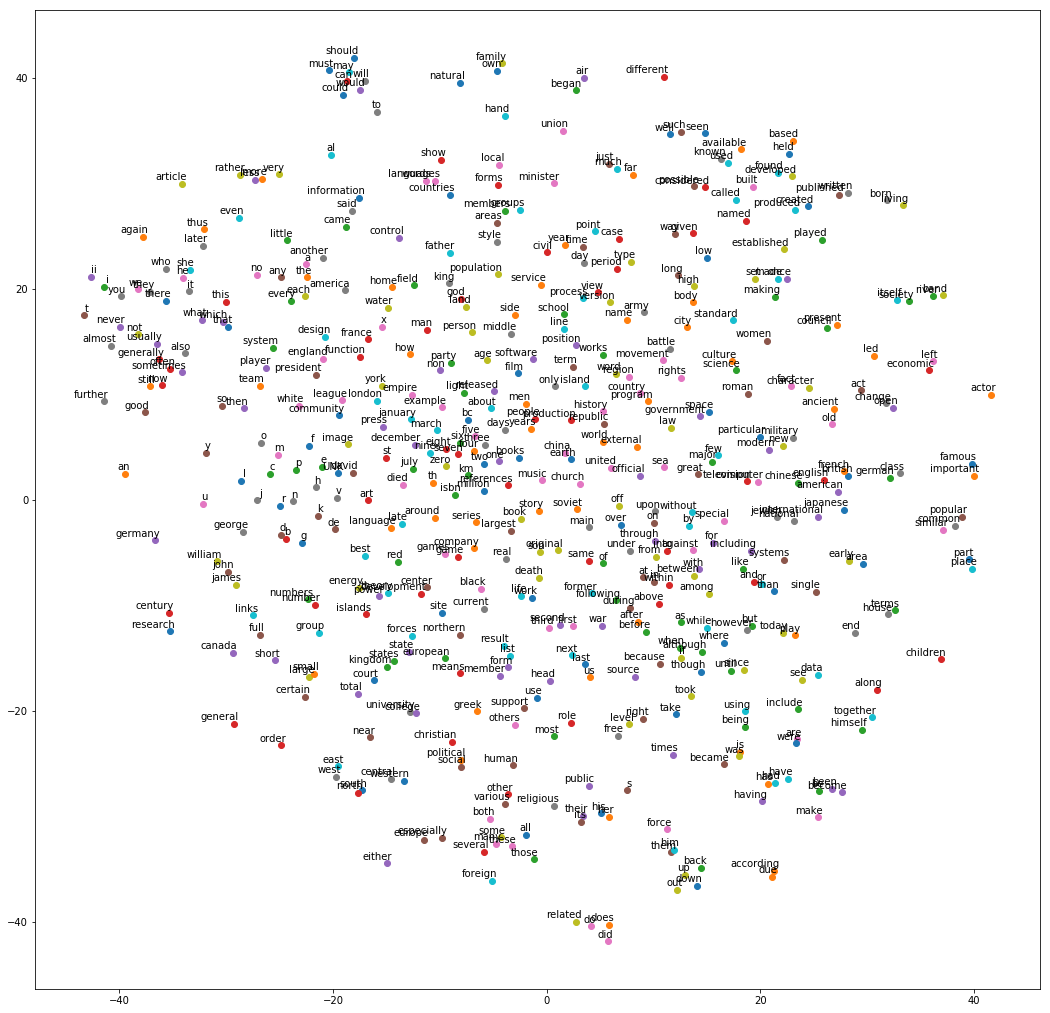

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import collections
import math
import os
import random
import sys
from tempfile import gettempdir
import zipfile

import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

from tensorflow.contrib.tensorboard.plugins import projector

data_index = 0


def word2vec_basic(log_dir):
  """Example of building, training and visualizing a word2vec model."""
  # Create the directory for TensorBoard variables if there is not.
  if not os.path.exists(log_dir):
    os.makedirs(log_dir)

  # Step 1: Download the data.
  url = 'http://mattmahoney.net/dc/'

  # pylint: disable=redefined-outer-name
  def maybe_download(filename, expected_bytes):
    """Download a file if not present, and make sure it's the right size."""
    local_filename = os.path.join(gettempdir(), filename)
    if not os.path.exists(local_filename):
      local_filename, _ = urllib.request.urlretrieve(url + filename,
                                                     local_filename)
    statinfo = os.stat(local_filename)
    if statinfo.st_size == expected_bytes:
      print('Found and verified', filename)
    else:
      print(statinfo.st_size)
      raise Exception('Failed to verify ' + local_filename +
                      '. Can you get to it with a browser?')
    return local_filename

  filename = maybe_download('text8.zip', 31344016)

  # Read the data into a list of strings.
  def read_data(filename):
    """Extract the first file enclosed in a zip file as a list of words."""
    with zipfile.ZipFile(filename) as f:
      data = tf.compat.as_str(f.read(f.namelist()[0])).split()
    return data

  vocabulary = read_data(filename)
  print('Data size', len(vocabulary))

  # Step 2: Build the dictionary and replace rare words with UNK token.
  vocabulary_size = 50000

  def build_dataset(words, n_words):
    """Process raw inputs into a dataset."""
    count = [['UNK', -1]]
    count.extend(collections.Counter(words).most_common(n_words - 1))
    dictionary = {}
    for word, _ in count:
      dictionary[word] = len(dictionary)
    data = []
    unk_count = 0
    for word in words:
      index = dictionary.get(word, 0)
      if index == 0:  # dictionary['UNK']
        unk_count += 1
      data.append(index)
    count[0][1] = unk_count
    reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return data, count, dictionary, reversed_dictionary

  data, count, unused_dictionary, reverse_dictionary = build_dataset(
      vocabulary, vocabulary_size)
  del vocabulary  # Hint to reduce memory.
  print('Most common words (+UNK)', count[:5])
  print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

  # Step 3: Function to generate a training batch for the skip-gram model.
  def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1  # [ skip_window target skip_window ]
    buffer = collections.deque(maxlen=span)  # pylint: disable=redefined-builtin
    if data_index + span > len(data):
      data_index = 0
    buffer.extend(data[data_index:data_index + span])
    data_index += span
    for i in range(batch_size // num_skips):
      context_words = [w for w in range(span) if w != skip_window]
      words_to_use = random.sample(context_words, num_skips)
      for j, context_word in enumerate(words_to_use):
        batch[i * num_skips + j] = buffer[skip_window]
        labels[i * num_skips + j, 0] = buffer[context_word]
      if data_index == len(data):
        buffer.extend(data[0:span])
        data_index = span
      else:
        buffer.append(data[data_index])
        data_index += 1
    # Backtrack a little bit to avoid skipping words in the end of a batch
    data_index = (data_index + len(data) - span) % len(data)
    return batch, labels

  batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
  for i in range(8):
    print(batch[i], reverse_dictionary[batch[i]], '->', labels[i, 0],
          reverse_dictionary[labels[i, 0]])

  # Step 4: Build and train a skip-gram model.


  batch_size = 128
  embedding_size = 128  # Dimension of the embedding vector.
  skip_window = 1  # How many words to consider left and right.
  num_skips = 2  # How many times to reuse an input to generate a label.
  num_sampled = 64  # Number of negative examples to sample.

  
  valid_size = 16  # Random set of words to evaluate similarity on.
  valid_window = 100  # Only pick dev samples in the head of the distribution.
  valid_examples = np.random.choice(valid_window, valid_size, replace=False)

  graph = tf.Graph()

  with graph.as_default():

  
    # Input data.
    with tf.name_scope('inputs'):
      train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
      train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
      valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

    # Ops and variables pinned to the CPU because of missing GPU implementation
    with tf.device('/cpu:0'):
      # Look up embeddings for inputs.
      with tf.name_scope('embeddings'):
        embeddings = tf.Variable(
            tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
        embed = tf.nn.embedding_lookup(embeddings, train_inputs)

      # Construct the variables for the NCE loss
      with tf.name_scope('weights'):
        nce_weights = tf.Variable(
            tf.truncated_normal([vocabulary_size, embedding_size],
                                stddev=1.0 / math.sqrt(embedding_size)))
      with tf.name_scope('biases'):
        nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

    
    with tf.name_scope('loss'):
      loss = tf.reduce_mean(
          tf.nn.nce_loss(
              weights=nce_weights,
              biases=nce_biases,
              labels=train_labels,
              inputs=embed,
              num_sampled=num_sampled,
              num_classes=vocabulary_size))

    # Add the loss value as a scalar to summary.
    tf.summary.scalar('loss', loss)

    # Construct the SGD optimizer using a learning rate of 1.0.
    with tf.name_scope('optimizer'):
      optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

    # Compute the cosine similarity between minibatch examples and all
    # embeddings.
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
    normalized_embeddings = embeddings / norm
    valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings,
                                              valid_dataset)
    similarity = tf.matmul(
        valid_embeddings, normalized_embeddings, transpose_b=True)

    # Merge all summaries.
    merged = tf.summary.merge_all()

    # Add variable initializer.
    init = tf.global_variables_initializer()

    # Create a saver.
    saver = tf.train.Saver()

  # Step 5: Begin training.
  num_steps = 100001

  with tf.Session(graph=graph) as session:
    # Open a writer to write summaries.
    writer = tf.summary.FileWriter(log_dir, session.graph)

    # We must initialize all variables before we use them.
    init.run()
    print('Initialized')

    average_loss = 0
    for step in xrange(num_steps):
      batch_inputs, batch_labels = generate_batch(batch_size, num_skips,
                                                  skip_window)
      feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

      # Define metadata variable.
      run_metadata = tf.RunMetadata()

     
      _, summary, loss_val = session.run([optimizer, merged, loss],
                                         feed_dict=feed_dict,
                                         run_metadata=run_metadata)
      average_loss += loss_val

      # Add returned summaries to writer in each step.
      writer.add_summary(summary, step)
      # Add metadata to visualize the graph for the last run.
      if step == (num_steps - 1):
        writer.add_run_metadata(run_metadata, 'step%d' % step)

      if step % 2000 == 0:
        if step > 0:
          average_loss /= 2000
        # The average loss is an estimate of the loss over the last 2000
        # batches.
        print('Average loss at step ', step, ': ', average_loss)
        average_loss = 0

      # Note that this is expensive (~20% slowdown if computed every 500 steps)
      if step % 10000 == 0:
        sim = similarity.eval()
        for i in xrange(valid_size):
          valid_word = reverse_dictionary[valid_examples[i]]
          top_k = 8  # number of nearest neighbors
          nearest = (-sim[i, :]).argsort()[1:top_k + 1]
          log_str = 'Nearest to %s:' % valid_word
          for k in xrange(top_k):
            close_word = reverse_dictionary[nearest[k]]
            log_str = '%s %s,' % (log_str, close_word)
          print(log_str)
    final_embeddings = normalized_embeddings.eval()

    # Write corresponding labels for the embeddings.
    with open(log_dir + '/metadata.tsv', 'w') as f:
      for i in xrange(vocabulary_size):
        f.write(reverse_dictionary[i] + '\n')

    # Save the model for checkpoints.
    saver.save(session, os.path.join(log_dir, 'model.ckpt'))

    # Create a configuration for visualizing embeddings with the labels in
    # TensorBoard.
    config = projector.ProjectorConfig()
    embedding_conf = config.embeddings.add()
    embedding_conf.tensor_name = embeddings.name
    embedding_conf.metadata_path = os.path.join(log_dir, 'metadata.tsv')
    projector.visualize_embeddings(writer, config)

  writer.close()

  # Step 6: Visualize the embeddings.

  # pylint: disable=missing-docstring
  # Function to draw visualization of distance between embeddings.
  def plot_with_labels(low_dim_embs, labels, filename):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
      x, y = low_dim_embs[i, :]
      plt.scatter(x, y)
      plt.annotate(
          label,
          xy=(x, y),
          xytext=(5, 2),
          textcoords='offset points',
          ha='right',
          va='bottom')

    plt.savefig(filename)

  try:
    # pylint: disable=g-import-not-at-top
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt

    tsne = TSNE(
        perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
    plot_only = 500
    low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
    labels = [reverse_dictionary[i] for i in xrange(plot_only)]
    plot_with_labels(low_dim_embs, labels, os.path.join(gettempdir(),
                                                        'tsne.png'))

  except ImportError as ex:
    print('Please install sklearn, matplotlib, and scipy to show embeddings.')
    print(ex)


# All functionality is run after tf.compat.v1.app.run() (b/122547914). This
# could be split up but the methods are laid sequentially with their usage for
# clarity.
def main(unused_argv):
  # Give a folder path as an argument with '--log_dir' to save
  # TensorBoard summaries. Default is a log folder in current directory.
  current_path = os.path.dirname(os.path.realpath(sys.argv[0]))

  parser = argparse.ArgumentParser()
  parser.add_argument(
      '--log_dir',
      type=str,
      default=os.path.join(current_path, 'log'),
      help='The log directory for TensorBoard summaries.')
  flags, unused_flags = parser.parse_known_args()
  word2vec_basic(flags.log_dir)


if __name__ == '__main__':
  tf.app.run()

##GloVe(Global Vectors)

Another well-known model that learns vectors or words from their co-occurrence information, i.e. how frequently they appear together in large text corpora, is GlobalVectors (GloVe). While word2vec is a predictive model — a feed-forward neural network that learns vectors to improve the predictive ability, GloVe is a count-based model.

##What is a count-based model?

Generally speaking, count-based models learn vectors by doing dimensionality reduction on a co-occurrence counts matrix. First they construct a large matrix of co-occurrence information, which contains the information on how frequently each “word” (stored in rows), is seen in some “context” (the columns). The number of “contexts” needs be large, since it is essentially combinatorial in size. Afterwards they factorize this matrix to yield a lower-dimensional matrix of words and features, where each row yields a vector representation for each word. It is achieved by minimizing a “reconstruction loss” which looks for lower-dimensional representations that can explain the variance in the high-dimensional data.

In the case of GloVe, the counts matrix is preprocessed by normalizing the counts and log-smoothing them. Compared to word2vec, GloVe allows for parallel implementation, which means that it’s easier to train over more data. It is believed (GloVe) to combine the benefits of the word2vec skip-gram model in the word analogy tasks, with those of matrix factorization methods exploiting global statistical information.

##GloVe at a Glance

 GloVe is essentially a log-bilinear model with a weighted least-squares objective. The model rests on a rather simple idea that ratios of word-word co-occurrence probabilities have the potential for encoding some form of meaning which can be encoded as vector differences. Therefore, the training objective is to learn word vectors such that their dot product equals the logarithm of the words’ probability of co-occurrence. As the logarithm of a ratio equals the difference of logarithms, this objective associates the ratios of co-occurrence probabilities with vector differences in the word vector space. It creates the word vectors that perform well on both word analogy tasks and on similarity tasks and named entity recognition
 
 


##Load Stanford’s GloVe Embedding
Stanford researchers also have their own word embedding algorithm like word2vec called Global Vectors for Word Representation, or GloVe for short.

I won’t get into the details of the differences between word2vec and GloVe here, but generally, NLP practitioners seem to prefer GloVe at the moment based on results.

Like word2vec, the GloVe researchers also provide pre-trained word vectors, in this case, a great selection to choose from.

You can download the GloVe pre-trained word vectors and load them easily with gensim.

The first step is to convert the GloVe file format to the word2vec file format. The only difference is the addition of a small header line. This can be done by calling the *glove2word2vec() *function. For example:

In [0]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.txt'
word2vec_output_file = 'word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

Once converted, the file can be loaded just like word2vec file above.

Let’s make this concrete with an example.

You can download the smallest GloVe pre-trained model from the GloVe website. It an 822 Megabyte zip file with 4 different models (50, 100, 200 and 300-dimensional vectors) trained on Wikipedia data with 6 billion tokens and a 400,000 word vocabulary.

The direct download link is here:
[glove.6B.zip](https://http://nlp.stanford.edu/data/glove.6B.zip)

Working with the 100-dimensional version of the model, we can convert the file to word2vec format as follows:

In [0]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

You now have a copy of the GloVe model in word2vec format with the filename glove.6B.100d.txt.word2vec.

Now we can load it and perform the same (king – man) + woman = ? test(as in the instagram post) The complete code listing is provided below. Note that the converted file is ASCII format, not binary, so we set binary=False when loading.




In [0]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

Running the example prints the same result of ‘queen’.

Result-> [('queen', 0.7698540687561035)]
